In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [6]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [15]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.4835 - acc: 0.8247 - val_loss: 0.3696 - val_acc: 0.8754
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2852 - acc: 0.9037 - val_loss: 0.2974 - val_acc: 0.8861
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2158 - acc: 0.9260 - val_loss: 0.2809 - val_acc: 0.8873
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1783 - acc: 0.9370 - val_loss: 0.2832 - val_acc: 0.8868
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1537 - acc: 0.9459 - val_loss: 0.3310 - val_acc: 0.8702
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1345 - acc: 0.9540 - val_loss: 0.3281 - val_acc: 0.8746
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1168 - acc: 0.9606 - val_loss: 0.3324 - val_acc: 0.8763
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1038 - a

In [8]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 45ms/step - loss: 0.5365 - acc: 0.8126 - val_loss: 0.4245 - val_acc: 0.8628
Epoch 2/20
49/49 [==============================] - 2s 31ms/step - loss: 0.3369 - acc: 0.8917 - val_loss: 0.3243 - val_acc: 0.8827
Epoch 3/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2518 - acc: 0.9138 - val_loss: 0.2890 - val_acc: 0.8872
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2069 - acc: 0.9279 - val_loss: 0.2887 - val_acc: 0.8842
Epoch 5/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1785 - acc: 0.9377 - val_loss: 0.2969 - val_acc: 0.8800
Epoch 6/20
49/49 [==============================] - 1s 31ms/step - loss: 0.1589 - acc: 0.9443 - val_loss: 0.2881 - val_acc: 0.8869
Epoch 7/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1428 - acc: 0.9516 - val_loss: 0.3003 - val_acc: 0.8820
Epoch 8/20
49/49 [==============================] - 1s 31ms/step - loss: 0.1298 - a

In [9]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

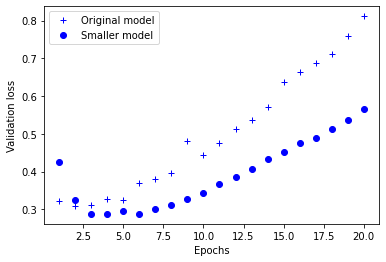

In [10]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [11]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [12]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 30s 605ms/step - loss: 0.5145 - acc: 0.7918 - val_loss: 0.2755 - val_acc: 0.8884
Epoch 2/20
49/49 [==============================] - 29s 590ms/step - loss: 0.2315 - acc: 0.9111 - val_loss: 0.3339 - val_acc: 0.8575
Epoch 3/20
49/49 [==============================] - 29s 589ms/step - loss: 0.1248 - acc: 0.9546 - val_loss: 0.3215 - val_acc: 0.8863
Epoch 4/20
49/49 [==============================] - 29s 591ms/step - loss: 0.0361 - acc: 0.9875 - val_loss: 0.4968 - val_acc: 0.8799
Epoch 5/20
49/49 [==============================] - 29s 591ms/step - loss: 0.0958 - acc: 0.9853 - val_loss: 0.5037 - val_acc: 0.8857
Epoch 6/20
49/49 [==============================] - 29s 591ms/step - loss: 0.1045 - acc: 0.9854 - val_loss: 0.5015 - val_acc: 0.8632
Epoch 7/20
49/49 [==============================] - 29s 591ms/step - loss: 8.0330e-04 - acc: 1.0000 - val_loss: 0.6590 - val_acc: 0.8816
Epoch 8/20
49/49 [==============================] - 29s 591ms/ste

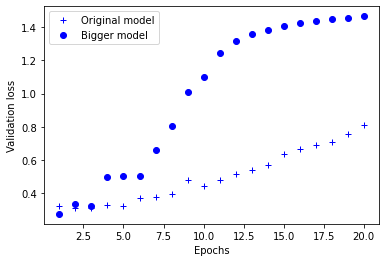

In [13]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

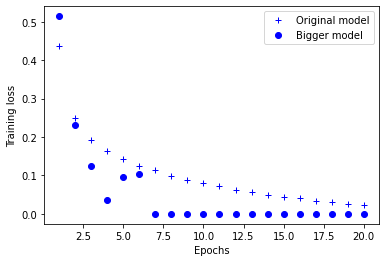

In [14]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

# 가중치 규제 추가

In [15]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation = 'relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation = 'relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
l2_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [17]:
l2_model_hist = l2_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 54ms/step - loss: 0.4988 - acc: 0.8171 - val_loss: 0.3897 - val_acc: 0.8754
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3199 - acc: 0.9038 - val_loss: 0.3547 - val_acc: 0.8782
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2744 - acc: 0.9203 - val_loss: 0.3300 - val_acc: 0.8890
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2537 - acc: 0.9274 - val_loss: 0.3717 - val_acc: 0.8692
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2398 - acc: 0.9337 - val_loss: 0.3392 - val_acc: 0.8846
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2340 - acc: 0.9360 - val_loss: 0.3674 - val_acc: 0.8753
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2245 - acc: 0.9384 - val_loss: 0.3575 - val_acc: 0.8803
Epoch 8/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2236 - a

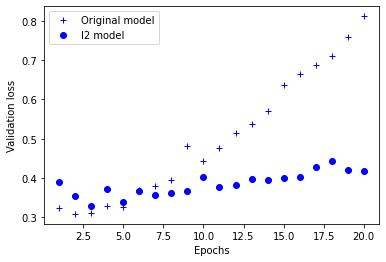

In [18]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='l2 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [19]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)

regularizers.l1_l2(l1=0.001, l2=0.001)

# dropout

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

dropout_model = models.Sequential()
dropout_model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation = 'relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
dropout_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [9]:
dropout_model_hist = dropout_model.fit(x_train, y_train,
                                        epochs=20,
                                        batch_size=512,
                                        validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 63ms/step - loss: 0.5851 - acc: 0.6969 - val_loss: 0.4478 - val_acc: 0.8653
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4418 - acc: 0.8282 - val_loss: 0.3514 - val_acc: 0.8791
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3603 - acc: 0.8759 - val_loss: 0.3073 - val_acc: 0.8882
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3038 - acc: 0.8996 - val_loss: 0.2940 - val_acc: 0.8865
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2631 - acc: 0.9132 - val_loss: 0.2965 - val_acc: 0.8871
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2294 - acc: 0.9265 - val_loss: 0.2920 - val_acc: 0.8856
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2070 - acc: 0.9328 - val_loss: 0.3098 - val_acc: 0.8826
Epoch 8/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1888 - a

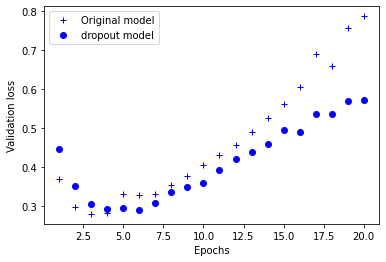

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()